<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 07/01/2021<b>

In [1]:
%matplotlib inline

# general libraries
import sys
import math
import operator
import itertools
import pydotplus
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import Counter
from collections import OrderedDict

from collections import defaultdict
from IPython.display import Image

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import arange
from numpy import unique
from numpy import argmax
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imbmake_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, classification_report, roc_auc_score 

In [2]:
from fim import apriori

In [3]:
data_directory = "../../../data/"
TR_impunted_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
TS_impunted_file = data_directory + "Impunted_Test_HR_Employee_Attrition.csv"
TR_not_impunted = data_directory + "Not_Impunted_Train_HR_Employee_Attrition.csv"
TS_not_impunted = data_directory + "Cleaned_Test_HR_Employee_Attrition.csv"

<h6>Impunted TR Dataframe</h6>

In [4]:
df_impunted = pd.read_csv(TR_impunted_file, sep=",") 
df_impunted.shape

(883, 30)

In [5]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_impunted[column_name]
    
# check dropping output
print(df_impunted.shape)

(883, 24)


In [6]:
df_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    int64  
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    int64  
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

<h6>Not-impunted TR DataFrame</h6>

In [7]:
df_not_impunted = pd.read_csv(TR_not_impunted, sep=",") 
df_not_impunted.shape

(883, 30)

In [8]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_not_impunted[column_name]
    
# check dropping output
print(df_not_impunted.shape)

(883, 24)


<h6> Impunted TS DataFrame </h6>

In [9]:
df_ts = pd.read_csv(TS_impunted_file, sep=",") 
df_ts.shape

(219, 24)

In [10]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       219 non-null    int64  
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            219 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    219 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             219 non-null    int64  
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h6> Not-impnted TS DataFrame </h6>

In [11]:
df_ts_not_impunted = pd.read_csv(TS_not_impunted, sep=",") 
df_ts_not_impunted.shape

del df_ts_not_impunted["Department"]
del df_ts_not_impunted["MonthlyRate"]


to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsAtCompany"] > 20]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsInCurrentRole"] > 16]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["MonthlyHours"] > 590.9767441860465]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

df_ts_not_impunted.shape

dropped rows = 	8
dropped rows = 	2
dropped rows = 	7


(219, 24)

In [12]:
df_ts_not_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       191 non-null    float64
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            202 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    208 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             168 non-null    float64
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h2> Continuos variables discretisation with K-Means</h2>
K-Means => similar bins' size => IBM's Age and opportunity equity 

In [13]:
df_converted = df_impunted.copy()
df_ts_conv = df_ts.copy()

In [14]:
def print_performed_encoding(column_name, train_encoded):
    column_index = df_impunted.columns.get_loc(column_name)
    encoding_info = {}
    for enc, i in zip(train_encoded, range(0, len(train_encoded))):
        try:
            tmp_list = encoding_info[str(enc)]
            tmp_list.append(df_impunted.iloc[i, column_index])
            encoding_info[str(enc)] = tmp_list
        except KeyError:
            encoding_info[str(enc)] = [df_impunted.iloc[i, column_index]]
            
    for key, value in encoding_info.items():
        min_value = min(value)
        max_value = max(value)
        print(column_name, key, "[%s-%s]" %(min_value, max_value),sep="\t")

In [15]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_converted[[column_name]])
    train_encoded = discretizer.transform(df_converted[[column_name]]).astype(int)
    df_converted[column_name] = train_encoded
    df_ts_conv[column_name] = discretizer.transform(df_ts_conv[[column_name]]).astype(int)
    print_performed_encoding(column_name, train_encoded)

Age	[3]	[48-60]
Age	[1]	[31-38]
Age	[0]	[18-30]
Age	[2]	[39-47]
DistanceFromHome	[1]	[6-13]
DistanceFromHome	[0]	[1-5]
DistanceFromHome	[2]	[14-21]
DistanceFromHome	[3]	[22-29]
MonthlyIncome	[1]	[7094-13888]
MonthlyIncome	[0]	[1009-6992]
MonthlyIncome	[2]	[14004-20520]
MonthlyIncome	[3]	[20933-26997]
NumCompaniesWorked	[3]	[7-9]
NumCompaniesWorked	[0]	[0-2]
NumCompaniesWorked	[1]	[3-4]
NumCompaniesWorked	[2]	[5-6]
PercentSalaryHike	[1]	[15-18]
PercentSalaryHike	[0]	[11-14]
PercentSalaryHike	[3]	[22-25]
PercentSalaryHike	[2]	[19-21]
YearsAtCompany	[1]	[6-10]
YearsAtCompany	[0]	[0-5]
YearsAtCompany	[2]	[11-14]
YearsAtCompany	[3]	[15-20]
YearsInCurrentRole	[1]	[5-8]
YearsInCurrentRole	[0]	[0-4]
YearsInCurrentRole	[2]	[9-12]
YearsInCurrentRole	[3]	[13-16]
TaxRate	[1]	[0.2033107599699022-0.4878233954330433]
TaxRate	[2]	[0.4902649218001915-0.7143783124261257]
TaxRate	[3]	[0.7168701095461659-0.9513959334891722]
TaxRate	[0]	[0.0-0.20014044943820225]
MonthlyHours	[1]	[151.64893617021278-264.325

In [16]:
for column_name in list(df_converted.columns):
    df_converted[column_name] = df_converted[column_name].astype(str) + "_" + column_name
    df_ts_conv[column_name] = df_ts_conv[column_name].astype(str) + "_" + column_name

In [17]:
# transaction creation 
df_db = df_converted.values.tolist()
df_ts_db = df_ts_conv.values.tolist()

<h6> Missing values TR and TS discretisation </h6>

In [18]:
df_not_impunted_converted = df_not_impunted.copy()
df_ts_not_imp_conv = df_ts_not_impunted.copy()

In [19]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_impunted[[column_name]])
    train_encoded = discretizer.transform(df_impunted[[column_name]]).astype(int)
    df_not_impunted_converted[column_name] = train_encoded
    df_ts_not_imp_conv[column_name] = discretizer.transform(df_ts[[column_name]]).astype(int)
    # print_performed_encoding(column_name, train_encoded)

In [20]:
for column_name in list(df_converted.columns):
    df_not_impunted_converted[column_name] = df_not_impunted_converted[column_name].astype(str) + "_" + column_name
    df_ts_not_imp_conv[column_name] = df_ts_not_imp_conv[column_name].astype(str) + "_" + column_name

In [21]:
missing_numeric_values_columns = ["Age", "YearsAtCompany", "MonthlyIncome", "TaxRate", "TrainingTimesLastYear"]
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

In [22]:
missing_categorical_values_columns = ["BusinessTravel", "Gender"]
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] != "Male" and \
        df_not_impunted.iloc[i, column_index] != "Female" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] != "Male" and \
        df_ts_not_impunted.iloc[i, column_index] != "Female" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_ts_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

<h1> Comparison between frequent, maximal and closed itemsets </h1>

- a **frequent itemsets** if its support is greater than or equal to the minimum value defined for
this measure;
- a **maximal itemset** if none of its immediate supersets is frequent;
- a **closed itemset**, if none of its immediate supersets has the same support as that of the itemset.


Remember also that given an association rule X -> Y, where X is a k-itemset, with k=2,...,n_features and Y is a 1-itemset ({"Yes_Attrtion"} or {"No_Attrition"}):
- **support(XuY) = support_count(XuY) / 883**;
- **confidence(XuY) = support_count(XuY) / support_count(X)**;
- **lift(XuY) = confidence(XuY) / support_count(Y)**

Additionally, since in our dataset employees leaving are 153/883 * 100 = 17.33 % we will search Yes_Attrition ARs having:

- support \in [1, 18]
- confidence \in [10, 20, 30, 40, 50, 60, 70, 80, 90]
and computing at the same time the lift.

In [23]:
# help(apriori)

In [24]:
zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
support_range = [10]
confidence_range = range(5, 101, 5)

Saving frequent, closed and maximal info in a global dict having the following format:
global_itemsets_info = {'z_min': {'min_supp': {'itemset_type': len(itemsets}}}

In [25]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        for conf in confidence_range:
            global_itemsets_info[str(zmin)][str(supp)][str(conf)] = {}
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"] = 0
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"] = []

In [26]:
itemset_types = ['r']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                itemsets = apriori(df_db, supp=supp, zmin=zmin, conf=conf, target=itemset_type, report='ascl')  
                print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(itemsets))
                # update global dict
                global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)] = len(itemsets)
                for itemset in itemsets:
                    lift = itemset[5]
                    global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"].append(lift)
        print()

Number of r itemsets for zmin=2, supp=10: 457367
Number of r itemsets for zmin=2, supp=10: 383132
Number of r itemsets for zmin=2, supp=10: 322119
Number of r itemsets for zmin=2, supp=10: 265131
Number of r itemsets for zmin=2, supp=10: 205857
Number of r itemsets for zmin=2, supp=10: 157517
Number of r itemsets for zmin=2, supp=10: 117284
Number of r itemsets for zmin=2, supp=10: 90148
Number of r itemsets for zmin=2, supp=10: 70082
Number of r itemsets for zmin=2, supp=10: 57355
Number of r itemsets for zmin=2, supp=10: 46381
Number of r itemsets for zmin=2, supp=10: 33459
Number of r itemsets for zmin=2, supp=10: 21939
Number of r itemsets for zmin=2, supp=10: 13740
Number of r itemsets for zmin=2, supp=10: 7712
Number of r itemsets for zmin=2, supp=10: 3993
Number of r itemsets for zmin=2, supp=10: 2232
Number of r itemsets for zmin=2, supp=10: 768
Number of r itemsets for zmin=2, supp=10: 147
Number of r itemsets for zmin=2, supp=10: 76

Number of r itemsets for zmin=3, supp=10: 

Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0

Number of r itemsets for zmin=12, supp=10: 0
Number of r itemsets for zmin=12, supp=10: 0
Number of r itemsets for zmin=12, supp=10: 0
Number of

Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0

Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of

In [27]:
def draw_multi_confidence_hist():
    y_r = [0]*len(confidence_range)
    
    for zmin in zmin_range:
        for supp in support_range:
                for conf, i in zip(confidence_range, range(0, len(confidence_range))):
                    for itemset_type in itemset_types:
                        y_r[i] += int(global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)])
    
    plt.ticklabel_format(style = 'plain')            
    plt.bar(confidence_range, y_r, ec="white", width=5)
    plt.title("Number of rules for confidence thresholds")
    plt.xlabel("% confidence")
    plt.ylabel("# rules")
    plt.show()

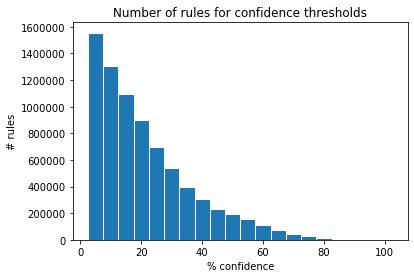

In [28]:
draw_multi_confidence_hist()

In [29]:
def draw_multi_lift_hist():
    y_r = []
    
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                y_r += global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"]
                
    plt.ticklabel_format(style='plain')            
    plt.hist(y_r, ec="white", width=0.2)
    plt.xlim([0.0, 2])
    plt.title("Number of rules for lift values")
    plt.xlabel("lift")
    plt.ylabel("# rules")
    plt.show()

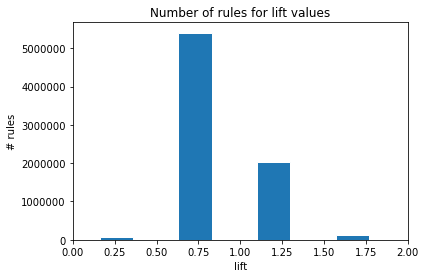

In [30]:
draw_multi_lift_hist()

<h2> Print rules with highest confidence</h2>

In [31]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        for conf in confidence_range:
            global_itemsets_info[str(zmin)][str(supp)][str(conf)] = {}
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"] = []
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"] = []

In [32]:
itemset_types = ['r']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                itemsets = apriori(df_db, supp=supp, zmin=zmin, conf=conf, target=itemset_type, report='ascl')  
                print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(itemsets))
                # update global dict
                for itemset in itemsets:
                    antecedents = itemset[1]
                    conseguent = itemset[0]
                    lift = itemset[5]
                    rule = antecedents + (conseguent,)  # post-pend conseguent to antecedents
                    global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)].append(rule)
                    global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"].append(lift)
        print()

Number of r itemsets for zmin=2, supp=10: 457367
Number of r itemsets for zmin=2, supp=10: 383132
Number of r itemsets for zmin=2, supp=10: 322119
Number of r itemsets for zmin=2, supp=10: 265131
Number of r itemsets for zmin=2, supp=10: 205857
Number of r itemsets for zmin=2, supp=10: 157517
Number of r itemsets for zmin=2, supp=10: 117284
Number of r itemsets for zmin=2, supp=10: 90148
Number of r itemsets for zmin=2, supp=10: 70082
Number of r itemsets for zmin=2, supp=10: 57355
Number of r itemsets for zmin=2, supp=10: 46381
Number of r itemsets for zmin=2, supp=10: 33459
Number of r itemsets for zmin=2, supp=10: 21939
Number of r itemsets for zmin=2, supp=10: 13740
Number of r itemsets for zmin=2, supp=10: 7712
Number of r itemsets for zmin=2, supp=10: 3993
Number of r itemsets for zmin=2, supp=10: 2232
Number of r itemsets for zmin=2, supp=10: 768
Number of r itemsets for zmin=2, supp=10: 147
Number of r itemsets for zmin=2, supp=10: 76

Number of r itemsets for zmin=3, supp=10: 

Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0
Number of r itemsets for zmin=11, supp=10: 0

Number of r itemsets for zmin=12, supp=10: 0
Number of r itemsets for zmin=12, supp=10: 0
Number of

Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0
Number of r itemsets for zmin=20, supp=10: 0

Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of r itemsets for zmin=21, supp=10: 0
Number of

In [33]:
import pickle
with open('all_association_rules.pickle', 'wb') as handle:
    pickle.dump(global_itemsets_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

<h6>Checking how many correlated AR (lift >= 1.1.) there are</h6>

In [ ]:
count = 0
correlated_ar = set()
for zmin in zmin_range:
    for supp in support_range:
        for conf in confidence_range:
            for i in range(0, len(global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"])):
                rule = global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"][i]
                lift = global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"][i]
                if float(lift) >= 1.1:
                    count += 1
                    correlated_ar.add(rule)
print("tot # of correlated AR = %d" % count)

In [ ]:
correlated_ar_conseguents = set()
for itemset in correlated_ar:
    # keeping only ARs which contains column's missing value as conseguent
    if "BusinessTravel" in str(itemset[-1]):
        correlated_ar_conseguents.add("BusinessTravel")
    else:
        correlated_ar_conseguents.add(str(itemset[-1]).split("_")[1])
print("correlated_ar_conseguents", len(correlated_ar_conseguents))

In [ ]:
correlated_ar_conseguents

In [ ]:
import pickle
with open('all_correlated_association_rules.pickle', 'wb') as handle:
    pickle.dump(correlated_ar, handle, protocol=pickle.HIGHEST_PROTOCOL)

<h2>Impute missing data using correlated AR</h2>

In [ ]:
missing_values_columns = missing_numeric_values_columns + missing_categorical_values_columns

<h6> Train imputation </h6>

In [ ]:
def get_ARs_with_which_to_impunt(missing_column_name): 
    ar_impunters = set()
    for itemset in correlated_ar:
        # keeping only ARs which contains column's missing value as conseguent
        if str(missing_column_name) in str(itemset[-1]):
            ar_impunters.add(itemset)
    return ar_impunters

In [ ]:
def AR_impunter(df, record_indeces, missing_column_name):
    missing_column_index = df.columns.get_loc(missing_column_name)
    ar_impunters = get_ARs_with_which_to_impunt(missing_column_name)
        
    # for every itemset I'm checking if the variables of the record with missing value/s 
    # match the ones present in the itemset. If it does so and the itemset contains also 
    # variables with which to impunt record's missing value/s, I'm taking a MAJORITY VOTE
    # among all Yes_Attrition ARs to impunte the missing value/s
    mode_guessing = [""]*len(record_indeces)
    for record_index, ri in zip(record_indeces, range(0, len(record_indeces))):
        tmp_mode_guessing = []
        for itemset in ar_impunters:
            matching_AR_flag = True
            for i in range(0, len(itemset)):  # I'm using also Attrition this time
                if "BusinessTravel" in itemset[i]:
                    column_name = "BusinessTravel"
                else:
                    column_name = itemset[i].split("_")[1]
                column_index = df.columns.get_loc(column_name)
                if column_index != missing_column_index:
                    if df.iloc[record_index, column_index] != itemset[i]:
                        matching_AR_flag = False
                        break
            if matching_AR_flag:
                # replacing missing values with ARs
                for j in range(0, len(itemset)):
                    if "BusinessTravel" in itemset[j]:
                        column_name = "BusinessTravel"
                    else:
                        column_name = itemset[j].split("_")[1]
                    column_index = df.columns.get_loc(column_name)
                    if column_index == missing_column_index:
                        tmp_mode_guessing.append(itemset[j])
            if len(tmp_mode_guessing) > 0:
                mode_guessing[ri] =  max(set(tmp_mode_guessing), key=tmp_mode_guessing.count)  # MAJORITY VOTE
                    
    return mode_guessing

In [ ]:
def impunt_missing_values(df):
    # # list of lists (each list contains DataFrame's records missing values per column, 
    # where the column are either extracted from missing_numeric_values_columns
    # and missing_categorical_values_columns arrays merged together)
    missing_values_record_indeces = []  
    
    # checking each record's missing values 
    # N.B if a record has more than one missing value, it will show multiple times
    # in the index process memorisation, but in different lists (different columns 
    # to impute)
    for column_name in missing_values_columns:
        column_attrition_index = df.columns.get_loc("Attrition")
        tmp_missing_idx = []
        for i in range(0, len(df)):
            column_index = df.columns.get_loc(column_name)
            try:
                df.iloc[i,column_index].split("_")
            except AttributeError:  # missing value (nan value)
                # missing value replacement with correlated ARs
                tmp_missing_idx.append(i)
                    
        missing_values_record_indeces.append(tmp_missing_idx)
    
    imputed_values = []
    for i in range(0, len(missing_values_columns)):
        record_indeces = missing_values_record_indeces[i]
        missing_column_name = missing_values_columns[i]
        missing_column_index = df.columns.get_loc(missing_column_name)
        mode_guessing = AR_impunter(df, record_indeces, missing_column_name)
        imputed_values.append(mode_guessing)
        
        not_impunted_records = 0
        for j in range(0, len(record_indeces)):
            if mode_guessing[j]:  # empty string == False
                # df.iloc[record_indeces[j], missing_column_index] = mode_guessing[j]
                pass
            else:
                 not_impunted_records += 1
        print("column %s impunted records=%d" % (missing_column_name, len(record_indeces) - not_impunted_records))
        print("column %s NOT impunted records=%d" % (missing_column_name, not_impunted_records))
        
    # return df  # imputation is made inside the function 
    return missing_values_record_indeces, imputed_values

In [ ]:
def get_impunted_train(df, indeces, column_index):
    y_train = []
    for idx in indeces:
        y_train.append(df.iloc[idx, column_index])
    return y_train

In [ ]:
def imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color):
    all_y_train = []
    all_y_pred = []
    for column_name, i in zip(missing_values_columns, range(0, len(missing_values_columns))):
        if type_flag == "train":
            column_index = df_converted.columns.get_loc(column_name)
            y_train = get_impunted_train(df_converted, missing_record_indeces[i], column_index)
        elif type_flag == "test":
            column_index = df_ts_conv.columns.get_loc(column_name)
            y_train = get_impunted_train(df_ts_conv, missing_record_indeces[i], column_index)
        else:
            print("Wrong type_flag %s" % type_flag)
            sys.exit(-1)
        y_pred = imputed_values[i]
        if len(y_train) != len(y_pred):
            print("different len in impunted test for column_name %s" % column_name)
            sys.exit(-1)
        all_y_train += y_train
        all_y_pred += y_pred
    print(classification_report(all_y_train, all_y_pred))
    # plot_imputation_report(all_y_train, all_y_pred, cmap, model_name, list(set(all_y_train)))
    # draw_normalized_confusion_matrises(model_name, all_y_train, all_y_pred, cmap)
    # draw_roc_and_pr_curves(model_name, all_y_train, all_y_pred, type_flag, color, impunters_global_info)

<h2> Train imputation </h6>

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, "AR impunter", "train", plt.cm.Blues, "blue")

<h2>Test imputation</h2> 

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, "AR impunter", "test", plt.cm.Blues, "blue")